# Con base en la tabla de datos mostrada en la diapositiva 4 de la presentación Introducción a la Visualización, realizar lo siguiente:


### Crear un archivo de esos datos en el formato CSV y leerlo en un Dataframe de Pandas.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Data.csv')
data

,Proc.,Time [s]
0,1,29278
1,16,178
2,25,78
3,64,16
4,256,2
5,400,1


### Completar las columnas de Speeup, Efficiency y Cost usando las fórmulas mostradas en la diapositiva 6, tanto para el caso absoluto como para el caso relativo con p' = 16. Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [3]:
import matplotlib.pyplot as plt

In [4]:
Speedup = []
Efficiency = []
Cost = []
S_rel = []
E_rel = []
Max_a_rel = []

In [5]:
#Calculando el Speedup ABSOLUTO
for i in data['Time [s]']:
    aux = data['Time [s]'][0] / i
    print(data['Time [s]'][0] ,"/", i,"=",aux)
    Speedup.append(aux)
# Speedup

29278 / 29278 = 1.0
29278 / 178 = 164.48314606741573
29278 / 78 = 375.35897435897436
29278 / 16 = 1829.875
29278 / 2 = 14639.0
29278 / 1 = 29278.0


In [6]:
#Calculando la eficiencia ABSOLUTA
k=0
for i in Speedup:
    aux = i / data['Proc.'][k]
    print(i,"/", data['Proc.'][k],"=",aux)
    Efficiency.append(aux)
    k+=1
# Efficiency

1.0 / 1 = 1.0
164.48314606741573 / 16 = 10.280196629213483
375.35897435897436 / 25 = 15.014358974358975
1829.875 / 64 = 28.591796875
14639.0 / 256 = 57.18359375
29278.0 / 400 = 73.195


In [7]:
#Calculando los costos
k=0
for i in data['Proc.']:
    aux = i * data['Time [s]'][k]
    print(i,"*", data['Time [s]'][k],"=",aux)
    Cost.append(aux)
    k+=1
# Cost

1 * 29278 = 29278
16 * 178 = 2848
25 * 78 = 1950
64 * 16 = 1024
256 * 2 = 512
400 * 1 = 400


In [8]:
#Calculando Aceleración Relativa con p'=16

tp = data['Time [s]'][1]

for i in data['Time [s]']:
    aux = tp / i
    print(tp,"/",i,"=",aux)
    S_rel.append(aux)
    
# S_rel

178 / 29278 = 0.006079650249333971
178 / 178 = 1.0
178 / 78 = 2.282051282051282
178 / 16 = 11.125
178 / 2 = 89.0
178 / 1 = 178.0


In [9]:
S_rel[0]

0.006079650249333971

In [10]:
#Calculando Eficiencia Relativa con p'=16

p = 16
k = 0
for i in data['Proc.']:
    aux = (p* S_rel[k]) / i
    print("(",p,"*",S_rel[k],") /",i,"=",aux)
    E_rel.append(aux)
    k+=1
    
# E_rel

( 16 * 0.006079650249333971 ) / 1 = 0.09727440398934353
( 16 * 1.0 ) / 16 = 1.0
( 16 * 2.282051282051282 ) / 25 = 1.4605128205128204
( 16 * 11.125 ) / 64 = 2.78125
( 16 * 89.0 ) / 256 = 5.5625
( 16 * 178.0 ) / 400 = 7.12


In [11]:
# Calculando máxima Aceleración Relativa con p'=16

for i in data['Proc.']:
    aux = i / p
    print(i,"/",p,"=",aux)
    Max_a_rel.append(aux)

# Max_a_rel

1 / 16 = 0.0625
16 / 16 = 1.0
25 / 16 = 1.5625
64 / 16 = 4.0
256 / 16 = 16.0
400 / 16 = 25.0


In [12]:
# Agregando nuestros datos al dataframe
data['Speedup'] = Speedup
data['Efficiency'] = Efficiency
data['Cost'] = Cost
#Agregamos los valores relativos para graficar
data['Aceleracion_rel'] = S_rel
data['Eficiencia_rel'] = E_rel
data['Max_ac_rel'] = Max_a_rel
data

,Proc.,Time [s],Speedup,Efficiency,Cost,Aceleracion_rel,Eficiencia_rel,Max_ac_rel
0,1,29278,1.000000,1.000000,29278,0.006080,0.097274,0.0625
1,16,178,164.483146,10.280197,2848,1.000000,1.000000,1.0000
2,25,78,375.358974,15.014359,1950,2.282051,1.460513,1.5625
3,64,16,1829.875000,28.591797,1024,11.125000,2.781250,4.0000
4,256,2,14639.000000,57.183594,512,89.000000,5.562500,16.0000
5,400,1,29278.000000,73.195000,400,178.000000,7.120000,25.0000


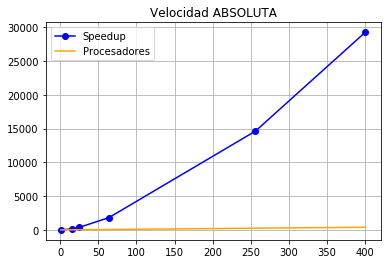

In [13]:
# Graficando

plt.grid()
plt.plot(data['Proc.'],data['Speedup'],'o-',color='blue')
plt.plot(data['Proc.'],data['Proc.'],color='orange')
plt.legend(('Speedup','Procesadores'))
plt.title('Velocidad ABSOLUTA')
plt.show()

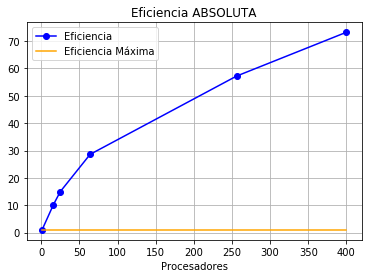

In [14]:
maX = [1,1,1,1,1,1] # sabemos que la máxima eficiencia es = 1
plt.grid()
plt.plot(data['Proc.'],data['Efficiency'],'o-',color='blue')
plt.plot(data['Proc.'],maX,color='orange')
plt.xlabel("Procesadores")
plt.legend(('Eficiencia','Eficiencia Máxima'))
plt.title('Eficiencia ABSOLUTA')
plt.show()

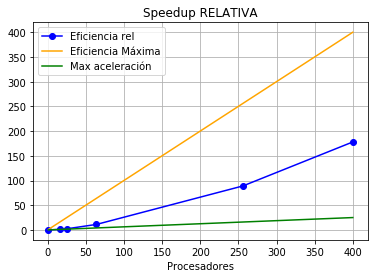

In [15]:
# Con los datos relativos
plt.grid()
plt.plot(data['Proc.'],data['Aceleracion_rel'],'o-',color='blue')
plt.plot(data['Proc.'],data['Proc.'],color='orange')
plt.plot(data['Proc.'],data['Max_ac_rel'],color='green')
plt.xlabel("Procesadores")
plt.legend(('Eficiencia rel','Eficiencia Máxima','Max aceleración'))
plt.title('Speedup RELATIVA')
plt.show()
#Nota, en la presentación se grafican a partir de p

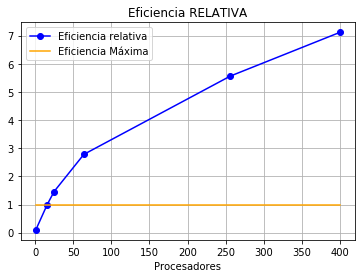

In [16]:

plt.grid()
plt.plot(data['Proc.'],data['Eficiencia_rel'],'o-',color='blue')
plt.plot(data['Proc.'],maX,color='orange')
plt.xlabel("Procesadores")
plt.legend(('Eficiencia relativa','Eficiencia Máxima'))
plt.title('Eficiencia RELATIVA')
plt.show()

#Nota, difiere con la presentación, puesto que no se grafica el primer punto, en lo personal, 
#No supe si debía eliminarlo o no, lo que me lleva a pensar que el primer dato es el atípico

### Generar información similar al punto 2, sustituyendo el valor atípico por el valor mostrado en la transparencia 9.  Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [17]:
data['Time [s]'][0]= 430
data

/home/jhonny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Proc.,Time [s],Speedup,Efficiency,Cost,Aceleracion_rel,Eficiencia_rel,Max_ac_rel
0,1,430,1.000000,1.000000,29278,0.006080,0.097274,0.0625
1,16,178,164.483146,10.280197,2848,1.000000,1.000000,1.0000
2,25,78,375.358974,15.014359,1950,2.282051,1.460513,1.5625
3,64,16,1829.875000,28.591797,1024,11.125000,2.781250,4.0000
4,256,2,14639.000000,57.183594,512,89.000000,5.562500,16.0000
5,400,1,29278.000000,73.195000,400,178.000000,7.120000,25.0000


In [18]:
Speedup = []
Efficiency = []
Cost = []
S_rel = []
E_rel = []
Max_a_rel = []

In [19]:
#Calculando el Speedup ABSOLUTO
for i in data['Time [s]']:
    aux = data['Time [s]'][0] / i
    print(data['Time [s]'][0] ,"/", i,"=",aux)
    Speedup.append(aux)
# Speedup

430 / 430 = 1.0
430 / 178 = 2.4157303370786516
430 / 78 = 5.512820512820513
430 / 16 = 26.875
430 / 2 = 215.0
430 / 1 = 430.0


In [20]:
#Calculando la eficiencia ABSOLUTA
k=0
for i in Speedup:
    aux = i / data['Proc.'][k]
    print(i,"/", data['Proc.'][k],"=",aux)
    Efficiency.append(aux)
    k+=1
# Efficiency

1.0 / 1 = 1.0
2.4157303370786516 / 16 = 0.15098314606741572
5.512820512820513 / 25 = 0.2205128205128205
26.875 / 64 = 0.419921875
215.0 / 256 = 0.83984375
430.0 / 400 = 1.075


In [21]:
#Calculando los costos
k=0
for i in data['Proc.']:
    aux = i * data['Time [s]'][k]
    print(i,"*", data['Time [s]'][k],"=",aux)
    Cost.append(aux)
    k+=1
# Cost

1 * 430 = 430
16 * 178 = 2848
25 * 78 = 1950
64 * 16 = 1024
256 * 2 = 512
400 * 1 = 400


In [22]:
#Calculando Aceleración Relativa con p'=16

tp = data['Time [s]'][1]

for i in data['Time [s]']:
    aux = tp / i
    print(tp,"/",i,"=",aux)
    S_rel.append(aux)
    
# S_rel

178 / 430 = 0.413953488372093
178 / 178 = 1.0
178 / 78 = 2.282051282051282
178 / 16 = 11.125
178 / 2 = 89.0
178 / 1 = 178.0


In [23]:
#Calculando Eficiencia Relativa con p'=16

p = 16
k = 0
for i in data['Proc.']:
    aux = (p* S_rel[k]) / i
    print("(",p,"*",S_rel[k],") /",i,"=",aux)
    E_rel.append(aux)
    k+=1
    
# E_rel

( 16 * 0.413953488372093 ) / 1 = 6.623255813953488
( 16 * 1.0 ) / 16 = 1.0
( 16 * 2.282051282051282 ) / 25 = 1.4605128205128204
( 16 * 11.125 ) / 64 = 2.78125
( 16 * 89.0 ) / 256 = 5.5625
( 16 * 178.0 ) / 400 = 7.12


In [24]:
# Calculando máxima Aceleración Relativa con p'=16

for i in data['Proc.']:
    aux = i / p
    print(i,"/",p,"=",aux)
    Max_a_rel.append(aux)

# Max_a_rel

1 / 16 = 0.0625
16 / 16 = 1.0
25 / 16 = 1.5625
64 / 16 = 4.0
256 / 16 = 16.0
400 / 16 = 25.0


In [25]:
# cambiando los datos del dataframe
data['Speedup'] = Speedup
data['Efficiency'] = Efficiency
data['Cost'] = Cost
#Agregamos los valores relativos para graficar
data['Aceleracion_rel'] = S_rel
data['Eficiencia_rel'] = E_rel
data['Max_ac_rel'] = Max_a_rel
data

,Proc.,Time [s],Speedup,Efficiency,Cost,Aceleracion_rel,Eficiencia_rel,Max_ac_rel
0,1,430,1.000000,1.000000,430,0.413953,6.623256,0.0625
1,16,178,2.415730,0.150983,2848,1.000000,1.000000,1.0000
2,25,78,5.512821,0.220513,1950,2.282051,1.460513,1.5625
3,64,16,26.875000,0.419922,1024,11.125000,2.781250,4.0000
4,256,2,215.000000,0.839844,512,89.000000,5.562500,16.0000
5,400,1,430.000000,1.075000,400,178.000000,7.120000,25.0000


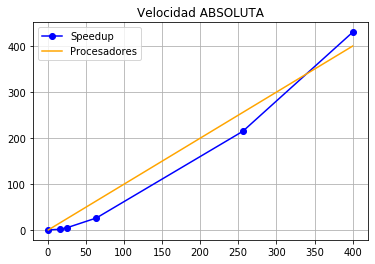

In [26]:
# Graficando nuevamente

plt.grid()
plt.plot(data['Proc.'],data['Speedup'],'o-',color='blue')
plt.plot(data['Proc.'],data['Proc.'],color='orange')
plt.legend(('Speedup','Procesadores'))
plt.title('Velocidad ABSOLUTA')
plt.show()

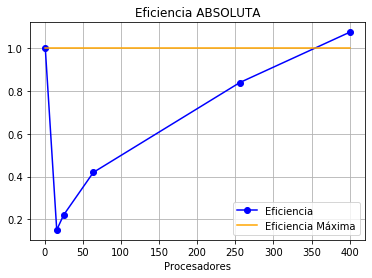

In [27]:
maX = [1,1,1,1,1,1] # sabemos que la máxima eficiencia es = 1
plt.grid()
plt.plot(data['Proc.'],data['Efficiency'],'o-',color='blue')
plt.plot(data['Proc.'],maX,color='orange')
plt.xlabel("Procesadores")
plt.legend(('Eficiencia','Eficiencia Máxima'))
plt.title('Eficiencia ABSOLUTA')
plt.show()

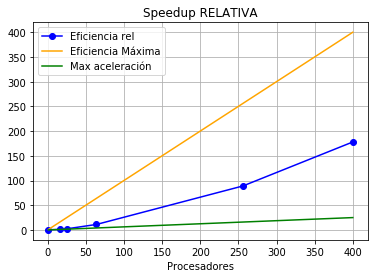

In [28]:
# Con los datos relativos
plt.grid()
plt.plot(data['Proc.'],data['Aceleracion_rel'],'o-',color='blue')
plt.plot(data['Proc.'],data['Proc.'],color='orange')
plt.plot(data['Proc.'],data['Max_ac_rel'],color='green')
plt.xlabel("Procesadores")
plt.legend(('Eficiencia rel','Eficiencia Máxima','Max aceleración'))
plt.title('Speedup RELATIVA')
plt.show()

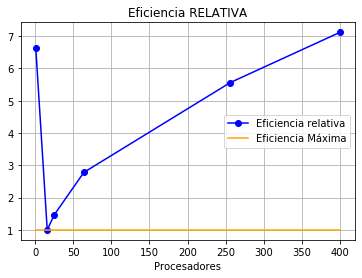

In [29]:
plt.grid()
plt.plot(data['Proc.'],data['Eficiencia_rel'],'o-',color='blue')
plt.plot(data['Proc.'],maX,color='orange')
plt.xlabel("Procesadores")
plt.legend(('Eficiencia relativa','Eficiencia Máxima'))
plt.title('Eficiencia RELATIVA')
plt.show()